In [37]:
from sklearn.datasets import load_iris
iris = load_iris()

In [38]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
import seaborn as sns
sns.color_palette("Dark2")

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

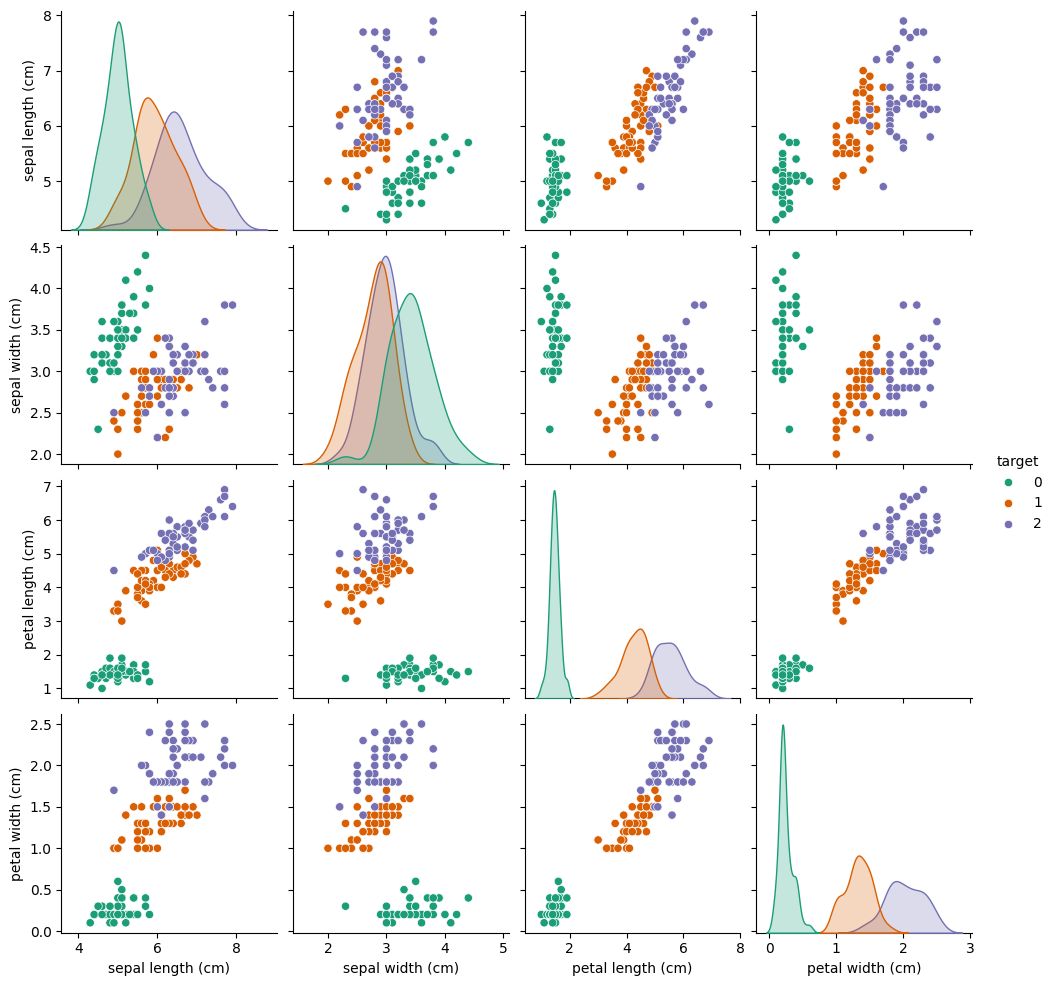

In [40]:
import matplotlib.pyplot as plt
sns.pairplot(df, hue="target",markers='o',palette='Dark2')
plt.show()

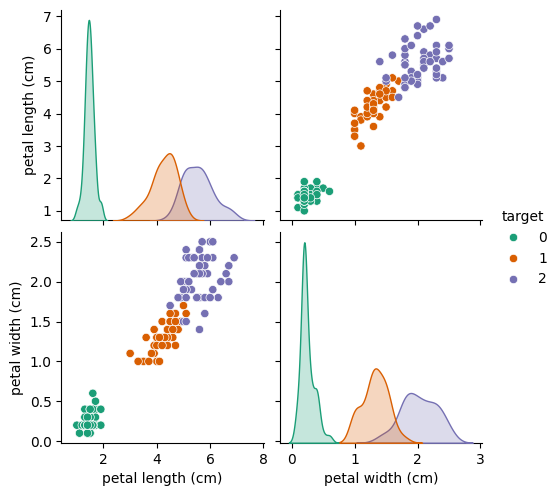

In [41]:
import matplotlib.pyplot as plt
sns.pairplot(df.drop(["sepal length (cm)","sepal width (cm)"],axis=1),hue="target",markers='o',palette='Dark2')
plt.show()

In [42]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["petal length (cm)","petal width (cm)","target"],axis=1),
                                                    df["target"],test_size=0.3)

In [44]:
x_train

,sepal length (cm),sepal width (cm)
36,5.5,3.5
146,6.3,2.5
126,6.2,2.8
86,6.7,3.1
79,5.7,2.6
...,...,...
76,6.8,2.8
141,6.9,3.1
20,5.4,3.4
8,4.4,2.9


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

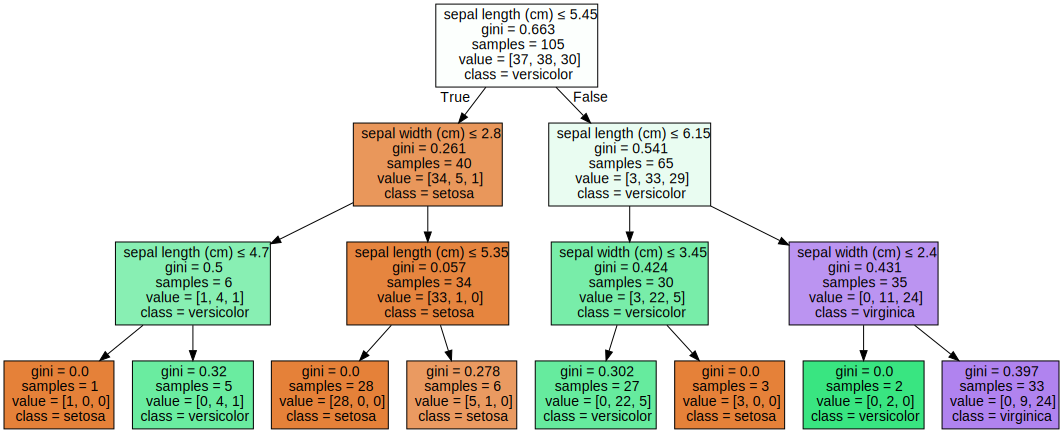

In [55]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(clf, out_file=None,
                   feature_names=['sepal length (cm)','sepal width (cm)'],
                   class_names=iris["target_names"],
                   filled=True, special_characters=True)
graph = graphviz.Source(g)
graph

In [57]:
pre = clf.predict(x_test)
print('預測正確:',list(pre))
print('真正標籤:',list(y_test))

預測正確: [2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1]
真正標籤: [2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1]


In [60]:
from sklearn.metrics import accuracy_score
pre_prob = str((accuracy_score(y_test,pre)*10000//1)/100)+'%'
print('預測機率:',pre_prob)

預測機率: 77.77%


In [59]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre),
             columns=iris["target_names"],
             index=iris["target_names"])

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,7,5
virginica,0,5,15
